In [1]:
import pandas as pd

df = pd.read_csv('../../data/chestx/MeSH/processed/openi.mesh.csv')
onehot_indexes = df['onehot_index'].unique()
print onehot_indexes

[   0    1    2 ..., 1330 1331 1332]


In [2]:
import numpy as np

tr_portion = 0.8
val_portion = 0.1
te_portion = 0.1
tr_ids = []
te_ids = []
val_ids = []
for onehot_indexi in onehot_indexes:
    dfi = df[df['onehot_index']==onehot_indexi]
    if len(dfi)<10:
        continue
    dfi_len_val = int(np.round(len(dfi)*0.1))
    dfi_len_te = int(np.round(len(dfi)*0.1))
    dfi_len_tr = len(dfi) - int(np.round(len(dfi)*0.2))
    
    tr_ids += dfi.iloc[:dfi_len_tr].id.tolist()
    te_ids += dfi.iloc[dfi_len_tr:dfi_len_tr+dfi_len_val].id.tolist()
    val_ids += dfi.iloc[dfi_len_tr+dfi_len_val::].id.tolist()

In [3]:
df_tr = df[df['id'].isin(tr_ids)]
df_te = df[df['id'].isin(te_ids)]
df_val = df[df['id'].isin(val_ids)]
print len(df_tr), len(df_val), len(df_val)

3506 433 433


In [4]:
ds = df_tr.groupby(['onehot_index']).size()[df.groupby(['onehot_index']).size()>30]
print ds, len(ds)

onehot_index
0       139
1      2157
10       65
14       94
15       94
19       49
21       64
66       37
75       51
78       29
87       30
165      67
177      26
227      31
252      29
269      31
283      33
dtype: int64 17


In [5]:
mesh_tops = []
for i1 in ds.index:
    mesh_tops.append(df_tr.loc[df['onehot_index']==i1]['mesh_top'].unique()[0])
for mesh_topi in mesh_tops: print mesh_topi

calcified_granuloma
normal
opacity
lung_hypoinflation
thoracic_vertebrae_degenerative
scoliosis
spine_degenerative
lung_hyperdistention
cardiomegaly
fractures_bone
catheters_indwelling
calcinosis
nodule
spondylosis
granulomatous_disease
osteophyte
surgical_instruments


In [6]:
ds.sort(ascending=False)
ds_index = ds.index.tolist()
ds_value = ds.tolist()
counts_normal = ds_value[0]
counts_max = ds_value[1]
counts_min = ds_value[-1]

default_aug_ratio = 4.0
normal_max_ratio = default_aug_ratio*counts_max/counts_normal
max_min_ratio = 1.0*counts_max/counts_min
normal_min_ratio = 1.0*counts_normal/counts_min
print 'normal_max_ratio:', normal_max_ratio
print 'max_min_ratio:', max_min_ratio
print 'normal_min_ratio:', normal_min_ratio

normal_max_ratio: 0.257765414928
max_min_ratio: 5.34615384615
normal_min_ratio: 82.9615384615


In [7]:
import csv, random
random.seed(123)
np.random.seed(123)

fl_pairs_tr_sa = []
fl_pairs_tr_sp = []
fl_pairs_te = []
fl_pairs_val = []

do_aug = False
for i2 in range(len(ds)):
    files_tr = df_tr.loc[df['onehot_index']==ds_index[i2]]['fname']
    for filei in files_tr:
        if i2==0:
            do_aug = False
            fl_pairs_tr_sa.append([filei, str(i2), int(do_aug)])
            if np.random.random_sample() > normal_max_ratio:
               continue
            do_aug = False
            fl_pairs_tr_sp.append([filei, str(i2), int(do_aug)])
        else:
            for i3 in range(int(np.round(1.0*default_aug_ratio*counts_max/ds_value[i2]))):
                if i3==0:
                    do_aug = False
                else:
                    do_aug = True
                fl_pairs_tr_sa.append([filei, str(i2), int(do_aug)])
                fl_pairs_tr_sp.append([filei, str(i2), int(do_aug)])
    
    do_aug = False
    files_te = df_te.loc[df['onehot_index']==ds_index[i2]]['fname']
    for filei in files_te:
        fl_pairs_te.append([filei, str(i2), int(do_aug)])
    files_val = df_val.loc[df['onehot_index']==ds_index[i2]]['fname']
    for filei in files_val:
        fl_pairs_val.append([filei, str(i2), int(do_aug)])

print len(fl_pairs_tr_sa), len(fl_pairs_tr_sp), len(fl_pairs_te), len(fl_pairs_val)

11088 9503 379 378


In [8]:
import glob
random.shuffle(fl_pairs_tr_sa)
random.shuffle(fl_pairs_tr_sp)
random.shuffle(fl_pairs_te)
random.shuffle(fl_pairs_val)
with open('data/iter0_im_tr_sa.csv', 'wb') as csvf:
    csvw = csv.writer(csvf, delimiter=' ')
    for fl_pairi in fl_pairs_tr_sa:
        csvw.writerow(fl_pairi)
with open('data/iter0_im_tr_sp.csv', 'wb') as csvf:
    csvw = csv.writer(csvf, delimiter=' ')
    for fl_pairi in fl_pairs_tr_sp:
        csvw.writerow(fl_pairi)
with open('data/iter0_im_te.csv', 'wb') as csvf:
    csvw = csv.writer(csvf, delimiter=' ')
    for fl_pairi in fl_pairs_te:
        csvw.writerow(fl_pairi)
with open('data/iter0_im_val.csv', 'wb') as csvf:
    csvw = csv.writer(csvf, delimiter=' ')
    for fl_pairi in fl_pairs_val:
        csvw.writerow(fl_pairi)
with open('data/iter0_im_val_0.csv', 'wb') as csvf:
    csvw = csv.writer(csvf, delimiter=' ')
    for fl_pairi in fl_pairs_val:
        csvw.writerow([fl_pairi[0], fl_pairi[1]])
for csvfi in glob.glob('data/iter0*.csv'): print csvfi

data/iter0_caps_only.csv
data/iter0_im_te.csv
data/iter0_im_tr_sa.csv
data/iter0_im_tr_saa0.csv
data/iter0_im_tr_saa1.csv
data/iter0_im_tr_sp.csv
data/iter0_im_val.csv
data/iter0_im_val_0.csv
data/iter0_imcaps_te.csv
data/iter0_imcaps_trval_all_disease_only.csv
data/iter0_label_names.csv


In [9]:
import os, commands
# os.chdir(os.path.join(os.path.expanduser('~'), 'workspace', 'learning_to_read', 'imcnn'))

model_name = 'nin_bn'
learning_rate = 0.1
batch_size = 32
image_size = 256
crop_size = 224
num_labels = len(ds)
do_aug = True
max_label = 0
max_2max_ratio = round(normal_max_ratio,2)

thcmd = 'th train256.lua --model ' + model_name + ' -s logs/' + model_name + '_imagenet_lr' +\
    str(learning_rate) + ' -b ' + str(batch_size) +\
    ' --trainData workspace/learning_to_read/src/chestx/data/iter0_im_tr_sa.csv' +\
    ' --testData workspace/learning_to_read/src/chestx/data/iter0_im_val.csv' +\
    ' --data_loc workspace/learning_to_read/data/chestx/ims --image_size ' + str(image_size) +\
    ' --crop_size ' + str(crop_size) + ' --use_pretrained false -r ' + str(learning_rate) +\
    ' --num_labels ' + str(num_labels) + ' --do_aug ' + str(do_aug).lower() +\
    ' --max_label ' + str(max_label) + ' --max_2max_ratio ' + str(max_2max_ratio)
    
print(thcmd)
    
# thcmd_runstat = commands.getstatusoutput(thcmd) # 0 if successful

th train256.lua --model nin_bn -s logs/nin_bn_imagenet_lr0.1 -b 32 --trainData workspace/learning_to_read/src/chestx/data/iter0_im_tr_sa.csv --testData workspace/learning_to_read/src/chestx/data/iter0_im_val.csv --data_loc workspace/learning_to_read/data/chestx/ims --image_size 256 --crop_size 224 --use_pretrained false -r 0.1 --num_labels 17 --do_aug true --max_label 0 --max_2max_ratio 0.26


In [10]:
import collections
fl_caps_only = []

for i2 in range(len(ds)):
    caps_tr = df_tr.loc[df['onehot_index']==ds_index[i2]]['terms_raw']
    for i4 in range(len(caps_tr)):
        capsi = caps_tr.iloc[i4]
        fl_caps_only.append(capsi)
    caps_te = df_te.loc[df['onehot_index']==ds_index[i2]]['terms_raw']
    for i4 in range(len(caps_te)):
        capsi = caps_te.iloc[i4]
        fl_caps_only.append(capsi)
    caps_val = df_val.loc[df['onehot_index']==ds_index[i2]]['terms_raw']
    for i4 in range(len(caps_val)):
        capsi = caps_val.iloc[i4]
        fl_caps_only.append(capsi)

random.shuffle(fl_caps_only)
caps_lengths_nnm = []
with open('data/iter0_caps_only.csv', 'wb') as csvf:
    for fl_caps_onlyi in fl_caps_only:
        if 'normal' not in fl_caps_onlyi:
            lengthi = len(fl_caps_onlyi.split(' '))
            caps_lengths_nnm.append(lengthi)
        csvf.write(fl_caps_onlyi + '\n')
    csvf.write('_empty_')
caps_lengths_npa = np.asarray(caps_lengths_nnm)
print 'caps_lengths -- max:', caps_lengths_npa.max(), ', min:', caps_lengths_npa.min(),\
    ', mean:', caps_lengths_npa.mean(), ', std:', caps_lengths_npa.std(),\
    ', mean+3*std:', caps_lengths_npa.mean() + 3*caps_lengths_npa.std()
caps_lengths_nnmc = collections.Counter(caps_lengths_nnm)
print '-- number of elements with word length --'
for i in range(caps_lengths_npa.max()):
    print str(i+1), ':', str(caps_lengths_nnmc[i+1])

caps_lengths -- max: 8 , min: 1 , mean: 2.56221198157 , std: 1.36007952168 , mean+3*std: 6.64245054661
-- number of elements with word length --
1 : 288
2 : 339
3 : 146
4 : 195
5 : 108
6 : 8
7 : 0
8 : 1


In [11]:
fl_imcaps_tr_sa = []
fl_imcaps_tr_sp = []
fl_imcaps_te = []
fl_imcaps_val = []

max_caps_length = 5

do_aug = False
for i2 in range(len(ds)):
    files_tr = df_tr.loc[df['onehot_index']==ds_index[i2]]['fname']
    caps_tr = df_tr.loc[df['onehot_index']==ds_index[i2]]['terms_raw']
    for i4 in range(len(files_tr)):
        filei = files_tr.iloc[i4]
        capsi = caps_tr.iloc[i4]
        
        capsi2 = capsi.split(' ')
        if len(capsi2)>max_caps_length: continue
        for i5 in range(max_caps_length-len(capsi2)): capsi2.append('_empty_')
        capsi3 = ' '.join(capsi2)

        if i2==0:
            do_aug = False
            fl_imcaps_tr_sa.append([filei, str(i2), int(do_aug), capsi3])
            if np.random.random_sample() > normal_max_ratio:
               continue
            do_aug = False
            fl_imcaps_tr_sp.append([filei, str(i2), int(do_aug)])
        else:
            for i3 in range(int(np.round(1.0*default_aug_ratio*counts_max/ds_value[i2]))):
                if i3==0:
                    do_aug = False
                else:
                    do_aug = True
                fl_imcaps_tr_sa.append([filei, str(i2), int(do_aug), capsi3])
                fl_imcaps_tr_sp.append([filei, str(i2), int(do_aug), capsi3])
    
    do_aug = False
    files_te = df_te.loc[df['onehot_index']==ds_index[i2]]['fname']
    caps_te = df_te.loc[df['onehot_index']==ds_index[i2]]['terms_raw']
    for i4 in range(len(files_te)):
        filei = files_te.iloc[i4]
        capsi = caps_te.iloc[i4]
        
        capsi2 = capsi.split(' ')
        if len(capsi2)>max_caps_length: continue
        for i5 in range(max_caps_length-len(capsi2)): capsi2.append('_empty_')
        capsi3 = ' '.join(capsi2)
        
        fl_imcaps_te.append([filei, str(i2), int(do_aug), capsi3])
    files_val = df_val.loc[df['onehot_index']==ds_index[i2]]['fname']
    caps_val = df_val.loc[df['onehot_index']==ds_index[i2]]['terms_raw']
    for i4 in range(len(files_val)):
        filei = files_val.iloc[i4]
        capsi = caps_val.iloc[i4]
        
        capsi2 = capsi.split(' ')
        if len(capsi2)>max_caps_length: continue
        for i5 in range(max_caps_length-len(capsi2)): capsi2.append('_empty_')
        capsi3 = ' '.join(capsi2)
        
        fl_imcaps_val.append([filei, str(i2), int(do_aug), capsi3])

print len(fl_imcaps_tr_sa), len(fl_imcaps_tr_sp), len(fl_imcaps_te), len(fl_imcaps_val)

10987 9400 379 376


In [12]:
import glob
random.shuffle(fl_imcaps_tr_sa)
random.shuffle(fl_imcaps_tr_sp)
random.shuffle(fl_imcaps_te)
random.shuffle(fl_imcaps_val)
with open('data/iter0_imcaps_te.csv', 'wb') as csvf:
    csvw = csv.writer(csvf, delimiter=' ', quotechar=' ')
    for fl_pairi in fl_imcaps_te:
        csvw.writerow(fl_pairi)

with open('data/label_names.csv', 'wb') as csvf:
    csvw = csv.writer(csvf, delimiter=' ', quotechar=' ')
    for i2 in range(len(ds)):
        label_names = df_tr.loc[df['onehot_index']==ds_index[i2]]['mesh_top']
        csvw.writerow([i2, label_names.iloc[0]])

max_rnn_epoch = 50
inputs_dir = 'data/iter0_imcaps_trval'
if not os.path.exists(inputs_dir):
    os.makedirs(inputs_dir)
fl_paris_tr_sa_val = fl_imcaps_tr_sa + fl_imcaps_val
for i in range(max_rnn_epoch):
    inputs_dir_epochi = os.path.join(inputs_dir, 'epoch' + str(i+1))
    if not os.path.exists(inputs_dir_epochi):
        os.makedirs(inputs_dir_epochi)  
    with open(os.path.join(inputs_dir_epochi, 'input.txt'), 'wb') as csvf:
        csvw = csv.writer(csvf, delimiter=' ', quotechar=' ')
        random.shuffle(fl_paris_tr_sa_val)
        for fl_pairi in fl_paris_tr_sa_val:
            if fl_pairi[1]==str(max_label) and np.random.random_sample() > normal_max_ratio:
                continue
            csvw.writerow(fl_pairi)


In [13]:
fl_pairs_tr_saa = []

do_aug = False
for i2 in range(len(ds)):
    files_tr = df_tr.loc[df['onehot_index']==ds_index[i2]]['fname']
    caps_tr = df_tr.loc[df['onehot_index']==ds_index[i2]]['terms_raw']
    for i4 in range(len(files_tr)):
        filei = files_tr.iloc[i4]
        capsi = caps_tr.iloc[i4]

        if i2==0:
            do_aug = True
            fl_pairs_tr_saa.append([filei, str(i2), capsi])
        else:
            for i3 in range(int(np.round(counts_normal/len(files_tr)))):
                do_aug = True
                fl_pairs_tr_saa.append([filei, str(i2), capsi])

In [14]:
len(fl_pairs_tr_saa)

36200

In [15]:
random.shuffle(fl_pairs_tr_saa)
with open('data/iter0_im_tr_saa0.csv', 'wb') as csvf:
    csvw = csv.writer(csvf, delimiter=' ')
    for fl_pairi in fl_pairs_tr_saa:
        csvw.writerow(fl_pairi)

In [16]:
#========== ENTERING PROCESSES FOR THE 2ND ITERATION =============#

In [17]:
df_trval = pd.concat([df_tr, df_val])
with open('data/iter0_imcaps_trval_all_disease_only.csv', 'wb') as csvf:
    for index, row in df_trval.iterrows():
        csvw = csv.writer(csvf, delimiter=' ', quotechar=' ')
        if row['onehot_index']==1:
            continue
        csvw.writerow([row['fname'], -1, 0, row['terms_raw']])

In [18]:
thcmd2 = 'th sample_for_next_iter.lua'
print(thcmd2)
    
# thcmd_runstat = commands.getstatusoutput(thcmd2) # 0 if successful

th sample_for_next_iter.lua


In [231]:
iter2dfnames = []
iter2dlabeln = []
iter2drnnsta = []
iter2dlabelnUnique = []
with open('../../txtrnn/cv/iter0/lm_gru_goo_1024_lr1e-4_dr0.9_epoch23.39_3.6279.t7_d4nextiter.txt', 'rb') as csvfr:
    csvr = csv.reader(csvfr, delimiter='|')
    for row in csvr:
        iter2dfnames.append(row[0])
        iter2dlabeln.append(row[1])
        iter2drnnsta.append(map(int, row[2].split(' ')))
        if row[1] not in iter2dlabelnUnique:
            iter2dlabelnUnique.append(row[1])

In [232]:
iter2drnnstaNp = np.array(iter2drnnsta)/1e4
iter2drnnstaNp.shape

(3020, 1024)

In [233]:
def find(lst, a):
    return [i for i, x in enumerate(lst) if x==a]
lenelements = []
for label2i in range(len(iter2dlabelnUnique)):
    elementsi = find(iter2dlabeln, iter2dlabelnUnique[label2i])
    lenelements.append(len(elementsi))

In [234]:
print np.array(lenelements).min(), np.array(lenelements).max(), np.array(lenelements).mean(), np.array(lenelements).std()

18 414 83.8888888889 86.0741856313


In [235]:
labelNum = 1
iter2_fl_pairsd = []
iter2_fl_pairsd_labels = []
label_name_pairs = [[0, 'normal']]
minNumElementsNotToCluster = np.round(np.array(lenelements).mean() + np.array(lenelements).std())
minNumElementPerCluster = 50
for iter2dlabelnUniquei in iter2dlabelnUnique:
    rnnstaiIdxs = find(iter2dlabeln, iter2dlabelnUniquei)
    rnnstai = iter2drnnstaNp[rnnstaiIdxs]
    if rnnstai.shape[0]<minNumElementsNotToCluster:
        for rnnstai2i in range(rnnstai.shape[0]):
            iter2_fl_pairsd.append([iter2dfnames[rnnstai2i], labelNum])
            iter2_fl_pairsd_labels.append(labelNum)
        label_name_pairs.append([labelNum, iter2dlabelnUniquei])
        labelNum += 1
    else:
        numClusters = np.round(rnnstai.shape[0]/minNumElementPerCluster)
        kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(rnnstai)
        labels = kmeans.predict(rnnstai)
        for rnnstai2i in range(rnnstai.shape[0]):
            iter2_fl_pairsd.append([iter2dfnames[rnnstai2i], labelNum + labels[rnnstai2i]])
            iter2_fl_pairsd_labels.append(labelNum)
        for clusteri in range(numClusters):
            label_name_pairs.append([labelNum, iter2dlabelnUniquei])
            labelNum += 1
for label_name_pairsi in label_name_pairs:
    print label_name_pairsi[0], label_name_pairsi[1]

0 normal
1 osteophyte
2 foreign_bodies
3 fractures_bone
4 calcified_granuloma
5 calcified_granuloma
6 calcified_granuloma
7 calcified_granuloma
8 calcified_granuloma
9 calcified_granuloma
10 calcified_granuloma
11 calcified_granuloma
12 cardiomegaly
13 calcinosis
14 calcinosis
15 calcinosis
16 calcinosis
17 opacity
18 opacity
19 opacity
20 opacity
21 thoracic_vertebrae_degenerative
22 thoracic_vertebrae_degenerative
23 thoracic_vertebrae_degenerative
24 thoracic_vertebrae_degenerative
25 catheters_indwelling
26 spondylosis
27 aorta_tortuous
28 lung_hyperdistention
29 lung_hypoinflation
30 lung_hypoinflation
31 lung_hypoinflation
32 lung_hypoinflation
33 lung_hypoinflation
34 aorta_thoracic
35 cicatrix
36 spine_degenerative
37 airspace_disease
38 granulomatous_disease
39 scoliosis
40 nodule
41 lung_bilateral
42 atherosclerosis
43 deformity
44 surgical_instruments
45 pleural_effusion
46 diaphragmatic_eventration
47 emphysema
48 medical_device
49 granuloma
50 markings_lung
51 implanted_me

In [236]:
iter2_fl_pairsn_tr = []
iter2_fl_pairsn_tr_labels = []
for index, row in df_tr.iterrows():
    if row['onehot_index']!=1:
        continue
    iter2_fl_pairsn_tr.append([row['fname'], 0])
    iter2_fl_pairsn_tr_labels.append(0)

iter2_fl_pairsn_val = []
iter2_fl_pairsn_val_labels = []
for index, row in df_val.iterrows():
    if row['onehot_index']!=1:
        continue
    iter2_fl_pairsn_val.append([row['fname'], 0])
    iter2_fl_pairsn_val_labels.append(0)

In [237]:
iter2_fl_pairsn_trval = iter2_fl_pairsn_tr + iter2_fl_pairsn_val
iter2_fl_pairsn_trval_labels = iter2_fl_pairsn_tr_labels + iter2_fl_pairsn_val_labels

iter2_fl_pairs_trval = iter2_fl_pairsn_trval + iter2_fl_pairsd
iter2_fl_pairs_trval_labels = iter2_fl_pairsn_trval_labels + iter2_fl_pairsd_labels

iter2_fl_pairs_tr = []
iter2_fl_pairs_val = []
iter2_fl_pairs_tr_labels = []
iter2_fl_pairs_val_labels = []
for ii in range(0,len(label_name_pairs)):
    elementsWithii = find(iter2_fl_pairs_trval_labels, ii)
    elementsWithii_tr = elementsWithii[:int(np.round(len(elementsWithii)*0.9))]
    elementsWithii_val = elementsWithii[int(np.round(len(elementsWithii)*0.9)):]
    for elementsWithii_tri in elementsWithii_tr:
        iter2_fl_pairs_tr.append(iter2_fl_pairs_trval[elementsWithii_tri])
        iter2_fl_pairs_tr_labels.append(iter2_fl_pairs_trval[elementsWithii_tri][1])
    for elementsWithii_vali in elementsWithii_val:
        iter2_fl_pairs_val.append(iter2_fl_pairs_trval[elementsWithii_vali])
        iter2_fl_pairs_val_labels.append(iter2_fl_pairs_trval[elementsWithii_vali][1])

In [238]:
fnames_trval = pd.concat([df_tr['fname'], df_val['fname']]).values.tolist()
augdns = np.zeros(len(fnames_trval), np.int)
with open('data/iter1_im_tr_saa1.csv', 'wb') as csvwf:
    csvw = csv.writer(csvwf, delimiter=' ')
    for iter2_fl_pairs_tri in iter2_fl_pairs_tr:
        labelaugd = iter2_fl_pairs_tri[1]
        if labelaugd == 0:
            for iter2ii in range(1):#(4):
                if augdns[fnames_trval.index(iter2_fl_pairs_tri[0])] == 0:
                    fnameaugd = iter2_fl_pairs_tri[0]
                else:
                    fnameaugd = iter2_fl_pairs_tri[0][:-4] + '_' +\
                                str(augdns[fnames_trval.index(iter2_fl_pairs_tri[0])]) + '.png'
                augdns[fnames_trval.index(iter2_fl_pairs_tri[0])] += 1
                csvw.writerow([fnameaugd, labelaugd, ''])
        else:
            numDoAugs = int(np.round(len(find(iter2_fl_pairs_tr_labels,0))/len(find(iter2_fl_pairs_tr_labels,labelaugd))))
            for iter2ii in range(numDoAugs):
                if augdns[fnames_trval.index(iter2_fl_pairs_tri[0])] == 0:
                    fnameaugd = iter2_fl_pairs_tri[0]
                else:                    
                    fnameaugd = iter2_fl_pairs_tri[0][:-4] + '_' +\
                                str(augdns[fnames_trval.index(iter2_fl_pairs_tri[0])]) + '.png'
                augdns[fnames_trval.index(iter2_fl_pairs_tri[0])] += 1
                csvw.writerow([fnameaugd, labelaugd, ''])

In [239]:
with open('data/iter1_im_val.csv', 'wb') as csvwf:
    csvw = csv.writer(csvwf, delimiter=' ')
    for iter2_fl_pairs_vali in iter2_fl_pairs_val:
        csvw.writerow([iter2_fl_pairs_vali[0], iter2_fl_pairs_vali[1], ''])

In [244]:
with open('data/iter1_label_names.csv', 'wb') as csvwf:
    csvw = csv.writer(csvwf, delimiter=' ')
    for label_name_pairsi in label_name_pairs:
        csvw.writerow([label_name_pairsi[0], label_name_pairsi[1]])
        
with open('data/iter1_label_names.txt', 'wb') as csvwf:
    csvw = csv.writer(csvwf, delimiter=' ')
    for label_name_pairsi in label_name_pairs:
        csvw.writerow([label_name_pairsi[1] + '_' + str(label_name_pairsi[0])])

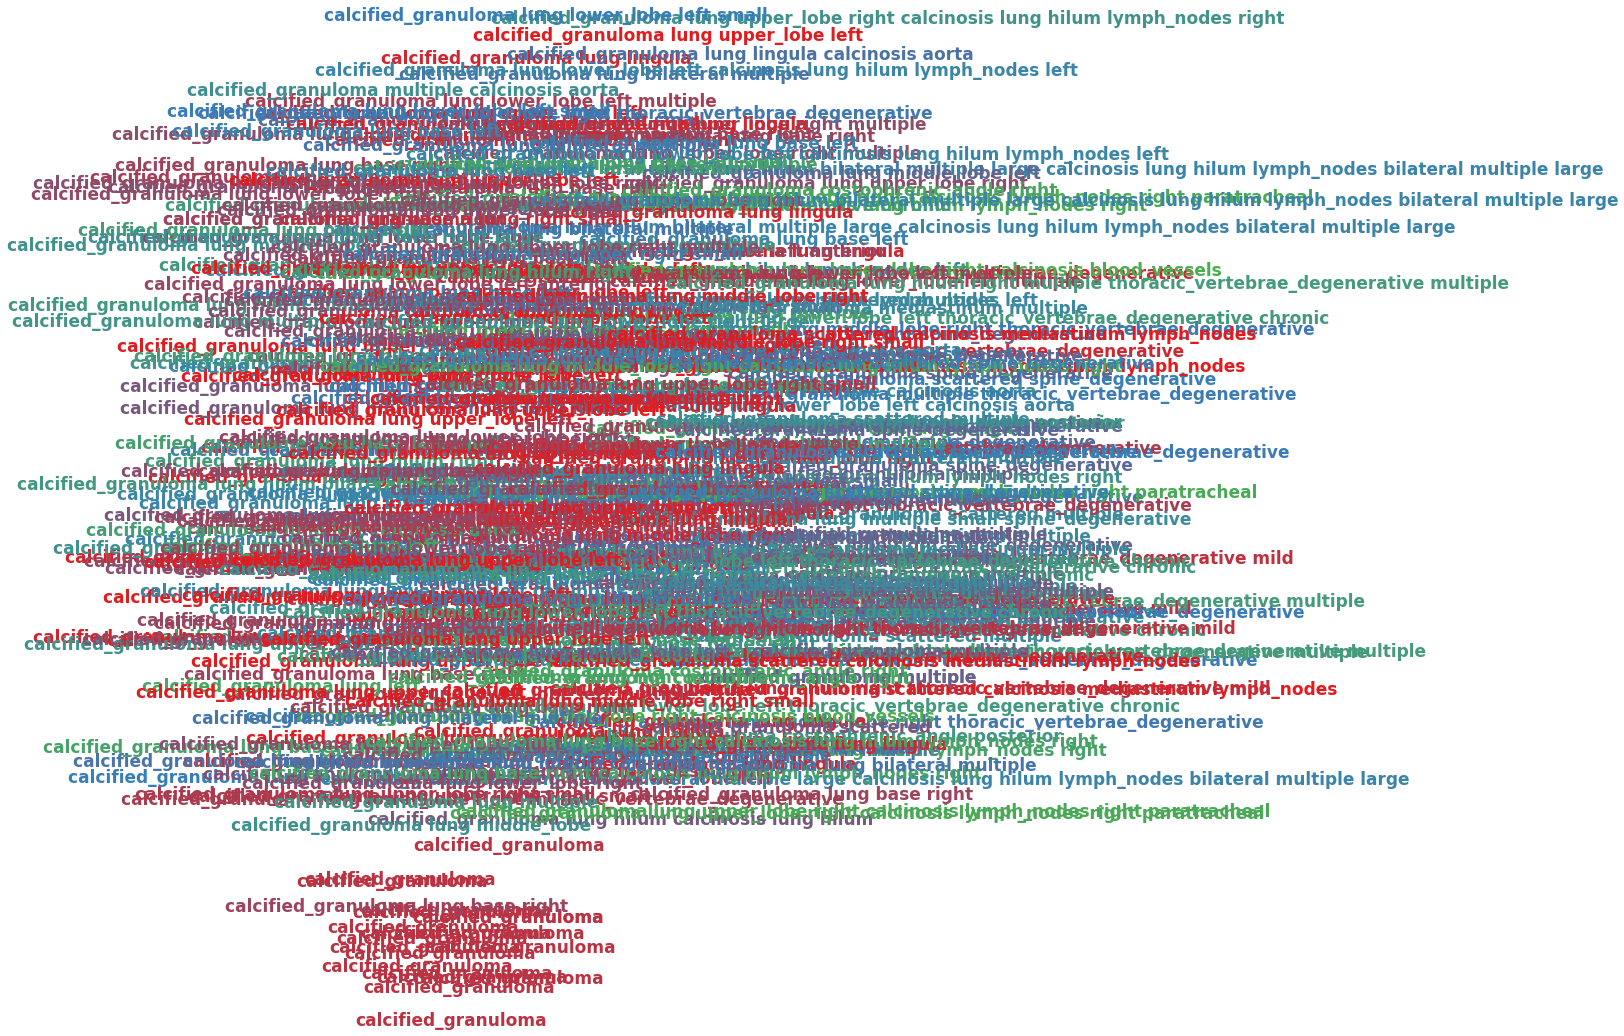

In [456]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = (14.0, 18.0)

import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold

# Scale and visualize the embedding vectors
def plot_embedding(X, y, cols, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    ax.axis('off')
    for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], y[i] + '_' + str(i),
        plt.text(X[i, 0], X[i, 1], y[i],
                 color=plt.cm.Set1(cols[i]),
                 fontdict={'weight': 'bold', 'size': 17})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

minNumElementsNotToCluster = np.round(np.array(lenelements).mean() + np.array(lenelements).std())
minNumElementPerCluster = 50
for iter2dlabelnUniquei in iter2dlabelnUnique:
    rnnstaiIdxs = find(iter2dlabeln, iter2dlabelnUniquei)
    rnnstai = iter2drnnstaNp[rnnstaiIdxs]
    if rnnstai.shape[0]<minNumElementsNotToCluster:
        pass
#         for rnnstai2i in range(rnnstai.shape[0]):
#             iter2_fl_pairsd.append([iter2dfnames[rnnstai2i], labelNum])
#             iter2_fl_pairsd_labels.append(labelNum)
#         label_name_pairs.append([labelNum, iter2dlabelnUniquei])
#         labelNum += 1
    else:
#         if iter2dlabelnUniquei != 'opacity': continue
        anns_all = []
        for rnnstaiIdxsi in rnnstaiIdxs:
            anni = df[df['fname']==iter2dfnames[rnnstaiIdxsi]]['terms_raw'].tolist()[0]
            if anni not in anns_all:
                anns_all.append(anni)
                
        anns = []
        cols = []
        for rnnstaiIdxsi in rnnstaiIdxs:
            anni = df[df['fname']==iter2dfnames[rnnstaiIdxsi]]['terms_raw'].tolist()[0]
            anns.append(anni)
            cols.append(anns_all.index(anni))
            
        tsne = manifold.TSNE(n_components=2, init='pca', random_state=9)
        X_tsne = tsne.fit_transform(rnnstai)
        
        #ploti = np.random.permutation(len(X_tsne)).tolist()
#         ploti = [225,127,163,23,22,321,370,396,99,188,162,334,397,161,278,368,140,81,349,112,151,10,294,406,333,38,39,288,62,286,287,261,350,265,341,366,181,297,120,188,45,252,32,331,3,289,144,142,401,101,253]
#         ploti = [132,53,15,204,197,122,148,182,146,135,127,43,143,162,168,7,63,29,131,70,144,103,54,190,158,6,80,194,87,200,203,205,144,62,84,94,59,172,36,146,105,30]
#         plot_embedding(X_tsne[ploti,:], [anns[i] for i in ploti], [cols[i] for i in ploti])
        plot_embedding(X_tsne, anns, cols)
        
        break
#         numClusters = np.round(rnnstai.shape[0]/minNumElementPerCluster)
#         kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(rnnstai)
#         labels = kmeans.predict(rnnstai)
#         for rnnstai2i in range(rnnstai.shape[0]):
#             iter2_fl_pairsd.append([iter2dfnames[rnnstai2i], labelNum + labels[rnnstai2i]])
#             iter2_fl_pairsd_labels.append(labelNum)
#         for clusteri in range(numClusters):
#             label_name_pairs.append([labelNum, iter2dlabelnUniquei])
#             labelNum += 1
# for label_name_pairsi in label_name_pairs:
#     print label_name_pairsi[0], label_name_pairsi[1]

In [443]:
ds2 = df_tr.groupby(['onehot_index']).size()[df.groupby(['onehot_index']).size()>10]
print ds2, len(ds2)

onehot_index
0       139
1      2157
7        12
9        19
10       65
14       94
15       94
18       12
19       49
21       64
30       14
55       14
61       14
66       37
67        9
72       14
74        9
75       51
78       29
87       30
93       10
96       17
110       9
119      13
122      18
123      18
125      18
133      11
141      22
152      16
165      67
177      26
190      18
199      10
227      31
235      12
239       9
243      17
252      29
269      31
275      12
283      33
297      17
301      18
309      13
324      10
390      10
665       9
dtype: int64 48


In [444]:
ds2.sort(ascending=False)
ds2_index = ds2.index.tolist()
ds2_value = ds2.tolist()

In [448]:
fl_caps_only_iter2 = []

for i2 in range(len(ds2)):
    caps_tr = df_tr.loc[df['onehot_index']==ds2_index[i2]]['terms_raw']
    for i4 in range(len(caps_tr)):
        capsi = caps_tr.iloc[i4]
        fl_caps_only_iter2.append(capsi)
    caps_te = df_te.loc[df['onehot_index']==ds2_index[i2]]['terms_raw']
    for i4 in range(len(caps_te)):
        capsi = caps_te.iloc[i4]
        fl_caps_only_iter2.append(capsi)
    caps_val = df_val.loc[df['onehot_index']==ds2_index[i2]]['terms_raw']
    for i4 in range(len(caps_val)):
        capsi = caps_val.iloc[i4]
        fl_caps_only_iter2.append(capsi)

random.shuffle(fl_caps_only_iter2)
caps_lengths_nnm_iter2 = []
with open('data/iter1_caps_only.csv', 'wb') as csvf:
    for fl_caps_onlyi in fl_caps_only_iter2:
        if 'normal' not in fl_caps_onlyi:
            lengthi = len(fl_caps_onlyi.split(' '))
            caps_lengths_nnm_iter2.append(lengthi)
        csvf.write(fl_caps_onlyi + '\n')
    csvf.write('_empty_')
caps_lengths_npa_iter2 = np.asarray(caps_lengths_nnm_iter2)
print 'caps_lengths -- max:', caps_lengths_npa_iter2.max(), ', min:', caps_lengths_npa_iter2.min(),\
    ', mean:', caps_lengths_npa_iter2.mean(), ', std:', caps_lengths_npa_iter2.std(),\
    ', mean+3*std:', caps_lengths_npa_iter2.mean() + 3*caps_lengths_npa_iter2.std()
caps_lengths_nnmc_iter2 = collections.Counter(caps_lengths_nnm_iter2)
print '-- number of elements with word length --'
for i in range(caps_lengths_npa_iter2.max()):
    print str(i+1), ':', str(caps_lengths_nnmc_iter2[i+1])

caps_lengths -- max: 13 , min: 1 , mean: 3.01739130435 , std: 1.8992501043 , mean+3*std: 8.71514161725
-- number of elements with word length --
1 : 323
2 : 489
3 : 247
4 : 274
5 : 160
6 : 36
7 : 19
8 : 21
9 : 22
10 : 8
11 : 9
12 : 0
13 : 2


In [447]:
fl_imcaps_tr_sa_iter2 = []
fl_imcaps_tr_sp_iter2 = []
fl_imcaps_te_iter2 = []
fl_imcaps_val_iter2 = []

max_caps_length = 5

do_aug = False
for i2 in range(len(ds2)):
    files_tr_iter2 = df_tr.loc[df['onehot_index']==ds2_index[i2]]['fname']
    caps_tr_iter2 = df_tr.loc[df['onehot_index']==ds2_index[i2]]['terms_raw']
    for i4 in range(len(files_tr_iter2)):
        filei = files_tr_iter2.iloc[i4]
        capsi = caps_tr_iter2.iloc[i4]
        
        capsi2 = capsi.split(' ')
        if len(capsi2)>max_caps_length: continue
        for i5 in range(max_caps_length-len(capsi2)): capsi2.append('_empty_')
        capsi3 = ' '.join(capsi2)

        if i2==0:
            do_aug = False
            fl_imcaps_tr_sa_iter2.append([filei, str(i2), int(do_aug), capsi3])
            if np.random.random_sample() > normal_max_ratio:
               continue
            do_aug = False
            fl_imcaps_tr_sp_iter2.append([filei, str(i2), int(do_aug)])
        else:
            for i3 in range(int(np.round(1.0*default_aug_ratio*counts_max/ds2_value[i2]))):
                if i3==0:
                    do_aug = False
                else:
                    do_aug = True
                fl_imcaps_tr_sa_iter2.append([filei, str(i2), int(do_aug), capsi3])
                fl_imcaps_tr_sp_iter2.append([filei, str(i2), int(do_aug), capsi3])
    
    do_aug = False
    files_te = df_te.loc[df['onehot_index']==ds2_index[i2]]['fname']
    caps_te = df_te.loc[df['onehot_index']==ds2_index[i2]]['terms_raw']
    for i4 in range(len(files_te)):
        filei = files_te.iloc[i4]
        capsi = caps_te.iloc[i4]
        
        capsi2 = capsi.split(' ')
        if len(capsi2)>max_caps_length: continue
        for i5 in range(max_caps_length-len(capsi2)): capsi2.append('_empty_')
        capsi3 = ' '.join(capsi2)
        
        fl_imcaps_te_iter2.append([filei, str(i2), int(do_aug), capsi3])
    files_val = df_val.loc[df['onehot_index']==ds2_index[i2]]['fname']
    caps_val = df_val.loc[df['onehot_index']==ds2_index[i2]]['terms_raw']
    for i4 in range(len(files_val)):
        filei = files_val.iloc[i4]
        capsi = caps_val.iloc[i4]
        
        capsi2 = capsi.split(' ')
        if len(capsi2)>max_caps_length: continue
        for i5 in range(max_caps_length-len(capsi2)): capsi2.append('_empty_')
        capsi3 = ' '.join(capsi2)
        
        fl_imcaps_val_iter2.append([filei, str(i2), int(do_aug), capsi3])

print len(fl_imcaps_tr_sa_iter2), len(fl_imcaps_tr_sp_iter2), len(fl_imcaps_te_iter2), len(fl_imcaps_val_iter2)

24974 23368 422 413


In [449]:
random.shuffle(fl_imcaps_tr_sa_iter2)
random.shuffle(fl_imcaps_tr_sp_iter2)
random.shuffle(fl_imcaps_te_iter2)
random.shuffle(fl_imcaps_val_iter2)
with open('data/iter1_imcaps_te.csv', 'wb') as csvf:
    csvw = csv.writer(csvf, delimiter=' ', quotechar=' ')
    for fl_pairi in fl_imcaps_te_iter2:
        csvw.writerow(fl_pairi)

max_rnn_epoch = 50
inputs_dir = 'data/iter1_imcaps_trval'
if not os.path.exists(inputs_dir):
    os.makedirs(inputs_dir)
fl_paris_tr_sa_val_iter2 = fl_imcaps_tr_sa_iter2 + fl_imcaps_val_iter2
for i in range(max_rnn_epoch):
    inputs_dir_epochi = os.path.join(inputs_dir, 'epoch' + str(i+1))
    if not os.path.exists(inputs_dir_epochi):
        os.makedirs(inputs_dir_epochi)  
    with open(os.path.join(inputs_dir_epochi, 'input.txt'), 'wb') as csvf:
        csvw = csv.writer(csvf, delimiter=' ', quotechar=' ')
        random.shuffle(fl_paris_tr_sa_val_iter2)
        for fl_pairi in fl_paris_tr_sa_val_iter2:
            if fl_pairi[1]==str(max_label) and np.random.random_sample() > normal_max_ratio:
                continue
            csvw.writerow(fl_pairi)